In [1]:
# LEts import necessary libraries
import time
import math
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense 
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from keras.layers.recurrent import LSTM
from keras.layers.core import Activation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Fawad\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
"""LSTM Model"""
#Creating LSTM model
# Define our model .....

np.random.seed(0)

co2 = pd.read_excel('co2.xlsx',usecols=[1])
co2 = co2.values

#Scaling data to be easily modifiable by the sigmoid and tanh functions   
scaler = MinMaxScaler(feature_range=(0, 1))
co2_scaled = scaler.fit_transform(co2)


In [4]:
"""Here we create more test data because if we use the previous splits
we will not get any values for test data as our time lag is 12 here
Therefore we create approximately 70% data for training and 30% for test"""
train = co2_scaled[:130]
test = co2_scaled[130:]


In [5]:
"""Lets split our Dtrain and Dtest into the training form required for NN
currently they are in time series form, we will create 12 columns""" 

#creating the training data
seasonality = 12

Xtrain, Ytrain = [], []

for i in range(len(train) - seasonality -1):
    Xtrain.append(train[i:(i+seasonality), 0])    # pick up the section in time_window size
    Ytrain.append(train[i+seasonality, 0])        # pick up the next one as the prediction
Xtrain = np.array(Xtrain)                         # Convert them from list to array   
Ytrain = np.array(Ytrain) 

#creatnig test data

Xtest, Ytest = [], []
for i in range(len(test) - seasonality -1):
    Xtest.append(test[i:(i+seasonality), 0])   # pick up the section in time_window size
    Ytest.append(test[i+seasonality, 0])       # pick up the next one as the prediction
Xtest = np.array(Xtest)                        # Convert them from list to array   
Ytest = np.array(Ytest) 



In [6]:
#defining model
model = Sequential()
# Add a LSTM with output_dim (number of hidden neurons) = 100
# input_dim = 1 (for time series) 
model.add(LSTM(input_shape=(None, 1), units=100, return_sequences=False))    # Many-to-One model
model.add(Dropout(0.2))             # Impose sparsity as we have so many hidden neurons
# As we will have 100 outputs from LSTM at each time step, we will use a linear layer to map them to a single "prediction" output
model.add(Dense(1))
model.add(Activation('linear'))

# Compiling model for use
start = time.time()
model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy']) #rmsprop
print("Compilation Time : ", time.time() - start)


Compilation Time :  0.03104996681213379


In [7]:
# reshaping data to match with keras package requriements
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], seasonality, 1))  
Xtest = np.reshape(Xtest, (Xtest.shape[0], seasonality, 1))


In [8]:
#fitting data on model
model.fit(Xtrain, Ytrain, nb_epoch=500, batch_size=5, verbose=2, validation_split=0.05)


C:\Users\Fawad\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 111 samples, validate on 6 samples
Epoch 1/500
0s - loss: 0.0271 - acc: 0.0090 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 2/500
0s - loss: 0.0108 - acc: 0.0090 - val_loss: 0.0654 - val_acc: 0.0000e+00
Epoch 3/500
0s - loss: 0.0124 - acc: 0.0090 - val_loss: 0.0247 - val_acc: 0.0000e+00
Epoch 4/500
0s - loss: 0.0099 - acc: 0.0090 - val_loss: 0.0202 - val_acc: 0.0000e+00
Epoch 5/500
0s - loss: 0.0104 - acc: 0.0090 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 6/500
0s - loss: 0.0087 - acc: 0.0090 - val_loss: 0.0450 - val_acc: 0.0000e+00
Epoch 7/500
0s - loss: 0.0083 - acc: 0.0090 - val_loss: 0.0090 - val_acc: 0.0000e+00
Epoch 8/500
0s - loss: 0.0072 - acc: 0.0090 - val_loss: 0.0058 - val_acc: 0.0000e+00
Epoch 9/500
0s - loss: 0.0078 - acc: 0.0090 - val_loss: 0.0253 - val_acc: 0.0000e+00
Epoch 10/500
0s - loss: 0.0085 - acc: 0.0090 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 11/500
0s - loss: 0.0066 - acc: 0.0090 - val_loss: 0.0106 - val_acc: 0.0000e+00
Epoch 12/500
0s - l

0s - loss: 7.8305e-04 - acc: 0.0090 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 96/500
0s - loss: 9.9503e-04 - acc: 0.0090 - val_loss: 5.6118e-04 - val_acc: 0.0000e+00
Epoch 97/500
0s - loss: 0.0011 - acc: 0.0090 - val_loss: 6.0255e-04 - val_acc: 0.0000e+00
Epoch 98/500
0s - loss: 6.4896e-04 - acc: 0.0090 - val_loss: 5.2566e-04 - val_acc: 0.0000e+00
Epoch 99/500
0s - loss: 8.9866e-04 - acc: 0.0090 - val_loss: 0.0023 - val_acc: 0.0000e+00
Epoch 100/500
0s - loss: 0.0010 - acc: 0.0090 - val_loss: 0.0018 - val_acc: 0.0000e+00
Epoch 101/500
0s - loss: 0.0011 - acc: 0.0090 - val_loss: 3.5372e-04 - val_acc: 0.0000e+00
Epoch 102/500
0s - loss: 8.9324e-04 - acc: 0.0090 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 103/500
0s - loss: 0.0014 - acc: 0.0090 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 104/500
0s - loss: 8.6588e-04 - acc: 0.0090 - val_loss: 0.0019 - val_acc: 0.0000e+00
Epoch 105/500
0s - loss: 7.6105e-04 - acc: 0.0090 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 106/500
0s 

0s - loss: 5.0956e-04 - acc: 0.0090 - val_loss: 4.6059e-04 - val_acc: 0.0000e+00
Epoch 186/500
0s - loss: 8.2298e-04 - acc: 0.0090 - val_loss: 3.9329e-04 - val_acc: 0.0000e+00
Epoch 187/500
0s - loss: 8.2943e-04 - acc: 0.0090 - val_loss: 1.1771e-04 - val_acc: 0.0000e+00
Epoch 188/500
0s - loss: 6.9858e-04 - acc: 0.0090 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 189/500
0s - loss: 7.5561e-04 - acc: 0.0090 - val_loss: 1.6166e-04 - val_acc: 0.0000e+00
Epoch 190/500
0s - loss: 7.4799e-04 - acc: 0.0090 - val_loss: 2.0840e-04 - val_acc: 0.0000e+00
Epoch 191/500
0s - loss: 8.5404e-04 - acc: 0.0090 - val_loss: 0.0012 - val_acc: 0.0000e+00
Epoch 192/500
0s - loss: 7.6933e-04 - acc: 0.0090 - val_loss: 5.2215e-04 - val_acc: 0.0000e+00
Epoch 193/500
0s - loss: 7.8313e-04 - acc: 0.0090 - val_loss: 1.9627e-04 - val_acc: 0.0000e+00
Epoch 194/500
0s - loss: 6.1034e-04 - acc: 0.0090 - val_loss: 0.0010 - val_acc: 0.0000e+00
Epoch 195/500
0s - loss: 6.8314e-04 - acc: 0.0090 - val_loss: 0.0027 - val_a

0s - loss: 5.9668e-04 - acc: 0.0090 - val_loss: 2.7229e-04 - val_acc: 0.0000e+00
Epoch 273/500
0s - loss: 6.8745e-04 - acc: 0.0090 - val_loss: 9.7201e-04 - val_acc: 0.0000e+00
Epoch 274/500
0s - loss: 6.6891e-04 - acc: 0.0090 - val_loss: 6.0540e-04 - val_acc: 0.0000e+00
Epoch 275/500
0s - loss: 5.3216e-04 - acc: 0.0090 - val_loss: 1.7091e-04 - val_acc: 0.0000e+00
Epoch 276/500
0s - loss: 6.6912e-04 - acc: 0.0090 - val_loss: 3.1796e-04 - val_acc: 0.0000e+00
Epoch 277/500
0s - loss: 4.8280e-04 - acc: 0.0090 - val_loss: 4.1923e-04 - val_acc: 0.0000e+00
Epoch 278/500
0s - loss: 5.1410e-04 - acc: 0.0090 - val_loss: 1.6055e-04 - val_acc: 0.0000e+00
Epoch 279/500
0s - loss: 5.6986e-04 - acc: 0.0090 - val_loss: 3.0236e-04 - val_acc: 0.0000e+00
Epoch 280/500
0s - loss: 5.1747e-04 - acc: 0.0090 - val_loss: 5.8026e-04 - val_acc: 0.0000e+00
Epoch 281/500
0s - loss: 4.5627e-04 - acc: 0.0090 - val_loss: 3.6222e-04 - val_acc: 0.0000e+00
Epoch 282/500
0s - loss: 6.8415e-04 - acc: 0.0090 - val_loss: 9.

0s - loss: 4.4917e-04 - acc: 0.0090 - val_loss: 6.1724e-05 - val_acc: 0.0000e+00
Epoch 360/500
0s - loss: 4.8788e-04 - acc: 0.0090 - val_loss: 7.2417e-05 - val_acc: 0.0000e+00
Epoch 361/500
0s - loss: 4.3429e-04 - acc: 0.0090 - val_loss: 2.5881e-04 - val_acc: 0.0000e+00
Epoch 362/500
0s - loss: 5.8317e-04 - acc: 0.0090 - val_loss: 1.7207e-04 - val_acc: 0.0000e+00
Epoch 363/500
0s - loss: 4.3442e-04 - acc: 0.0090 - val_loss: 0.0013 - val_acc: 0.0000e+00
Epoch 364/500
0s - loss: 4.4282e-04 - acc: 0.0090 - val_loss: 4.0251e-04 - val_acc: 0.0000e+00
Epoch 365/500
0s - loss: 4.8523e-04 - acc: 0.0090 - val_loss: 4.0327e-04 - val_acc: 0.0000e+00
Epoch 366/500
0s - loss: 6.1438e-04 - acc: 0.0090 - val_loss: 2.5758e-04 - val_acc: 0.0000e+00
Epoch 367/500
0s - loss: 4.2491e-04 - acc: 0.0090 - val_loss: 1.1261e-04 - val_acc: 0.0000e+00
Epoch 368/500
0s - loss: 5.4250e-04 - acc: 0.0090 - val_loss: 0.0017 - val_acc: 0.0000e+00
Epoch 369/500
0s - loss: 4.8499e-04 - acc: 0.0090 - val_loss: 2.4628e-04

0s - loss: 3.5198e-04 - acc: 0.0090 - val_loss: 0.0024 - val_acc: 0.0000e+00
Epoch 447/500
0s - loss: 5.5870e-04 - acc: 0.0090 - val_loss: 1.0828e-04 - val_acc: 0.0000e+00
Epoch 448/500
0s - loss: 4.0190e-04 - acc: 0.0090 - val_loss: 1.5180e-04 - val_acc: 0.0000e+00
Epoch 449/500
0s - loss: 4.8391e-04 - acc: 0.0090 - val_loss: 1.6624e-04 - val_acc: 0.0000e+00
Epoch 450/500
0s - loss: 4.8516e-04 - acc: 0.0090 - val_loss: 3.3999e-04 - val_acc: 0.0000e+00
Epoch 451/500
0s - loss: 5.4375e-04 - acc: 0.0090 - val_loss: 2.3306e-04 - val_acc: 0.0000e+00
Epoch 452/500
0s - loss: 4.4776e-04 - acc: 0.0090 - val_loss: 4.3505e-04 - val_acc: 0.0000e+00
Epoch 453/500
0s - loss: 4.1267e-04 - acc: 0.0090 - val_loss: 2.1267e-04 - val_acc: 0.0000e+00
Epoch 454/500
0s - loss: 3.5500e-04 - acc: 0.0090 - val_loss: 1.5625e-04 - val_acc: 0.0000e+00
Epoch 455/500
0s - loss: 4.0172e-04 - acc: 0.0090 - val_loss: 1.3477e-04 - val_acc: 0.0000e+00
Epoch 456/500
0s - loss: 4.6226e-04 - acc: 0.0090 - val_loss: 1.0078

In [9]:
#predicting
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)


In [10]:
#rescaling back
trainPredict = scaler.inverse_transform(trainPredict)
Ytrain = scaler.inverse_transform(Ytrain[:,np.newaxis])
testPredict = scaler.inverse_transform(testPredict)
Ytest = scaler.inverse_transform(Ytest[:,np.newaxis])


In [11]:
#plotting results
#shifting train predictions for plotting
trainPredictPlot = np.empty_like(co2_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seasonality:len(trainPredict)+seasonality, :] = trainPredict
#shifting test predictions for plotting
testPredictPlot = np.empty_like(co2_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seasonality*2)+1:len(co2_scaled)-1, :] = testPredict


In [12]:
#finding overall prediction
Xall = [] 
for i in range(len(co2_scaled) - seasonality):
    Xall.append(co2_scaled[i:(i+seasonality), 0])           # pick up the section in time_window size
Xall = np.array(Xall)                                       # Convert them from list to array   
Xall = np.reshape(Xall, (Xall.shape[0], seasonality, 1))    # hide this when using 2 layer NN
allPredict = model.predict(Xall) 
allPredict = scaler.inverse_transform(allPredict)
allPredictPlot = np.empty_like(co2_scaled)
allPredictPlot[:, :] = np.nan
allPredictPlot[seasonality:, :] = allPredict



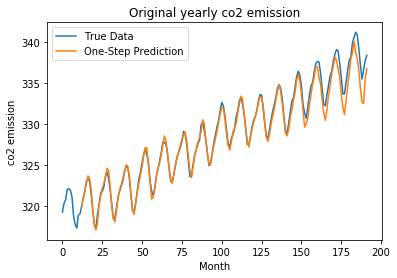

In [13]:
#plotting predictions
plt.figure()
plt.title('Original yearly co2 emission')
plt.xlabel('Month')
plt.ylabel('co2 emission')
plt.plot(scaler.inverse_transform(co2_scaled), label='True Data')
plt.plot(allPredictPlot, label='One-Step Prediction')
plt.legend()
plt.show()


In [14]:
#calculating RMSE
trainScore = math.sqrt(mean_squared_error(Ytrain, trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Ytest, testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))


Train Score: 0.384 RMSE
Test Score: 1.600 RMSE


In [15]:
#calculating MAPE
c = scaler.inverse_transform(co2_scaled)[-seasonality:]
d = allPredictPlot[-seasonality:]

MAPE=np.mean((abs(c-d)/c)*100)
print('NN MAPE : %.3f %%'%  (MAPE))

NN MAPE : 0.612 %
